In [6]:
from owid.catalog import Dataset
from etl.paths import DATA_DIR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ds = Dataset(
    DATA_DIR
    / "garden"
    / "tourism"
    / "2023-05-10"
    / "unwto_gdp"
)

df = pd.DataFrame(ds["unwto_gdp"])

df.head()

ds_env = Dataset(
    DATA_DIR
    / "garden"
    / "tourism"
    / "2023-05-10"
    / "unwto_environment"
)



df_gdp = pd.DataFrame(ds["unwto_gdp"])
df_env = pd.DataFrame(ds_env["unwto_environment"])

df.head()
# replace '<NA>' with np.nan
df_env = df_env.replace('<NA>', np.nan)
# drop rows with np.nan values
df_env = df_env.dropna()

In [8]:

df_gdp.set_index(['country', 'year'], inplace = True)
assert len(df_gdp.index.levels) == 2 and df.index.is_unique, "Index is not well constructed"
df_env.set_index(['country', 'year'], inplace = True)
assert len(df_env.index.levels) == 2 and df_env.index.is_unique, "Index is not well constructed"

In [3]:
df_env.reset_index(inplace= True)
df_env.rename(columns = {df_env.columns[2]: 'SEEA_tables',df_env.columns[3]: 'TSA_tables', df_env.columns[4]: 'Total_tables'}, inplace = True)

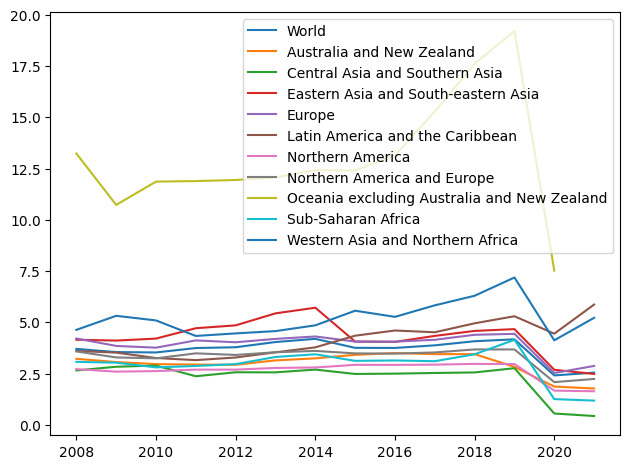

In [4]:

countries = ["World",
  "Australia and New Zealand",
  "Central Asia and Southern Asia",
  "Eastern Asia and South-eastern Asia",
  "Europe",
  "Latin America and the Caribbean",
  "Northern America",
  "Northern America and Europe",
  "Oceania excluding Australia and New Zealand",
  "Sub-Saharan Africa",
  "Western Asia and Northern Africa"]

df_filtered = df_gdp[df_gdp.index.get_level_values('country').isin(countries)]

# assuming your DataFrame has a MultiIndex with level 0 as country and level 1 as year

for i, country in enumerate(countries):
    df_country = df_filtered.loc[country]
    plt.plot(df_country.index.get_level_values('year'), df_country['gdp'], label = country)

plt.tight_layout()
plt.legend()
plt.show()



In [19]:
df_env.head()

,country,year,SEEA_tables,TSA_tables,Total_tables
0,Albania,2008,0,0,0
1,Albania,2009,0,0,0
2,Albania,2010,0,0,0
3,Albania,2011,0,0,0
4,Albania,2012,0,0,0


In [18]:
df_co2.head()

domestic_operations_pct_country_total__2019  \
country     year                                                
Afghanistan 2013                                          NaN   
            2018                                          NaN   
            2019                                     0.584336   
Algeria     2013                                          NaN   
            2018                                          NaN   

                  domestic_operations_pct_country_total__2019__1  \
country     year                                                   
Afghanistan 2013                                             NaN   
            2018                                             NaN   
            2019                                        0.173816   
Algeria     2013                                             NaN   
            2018                                             NaN   

                  domestic_operations_pct_country_total__2019__2  \
country     year                                                   
Afghanistan 2013                                             NaN   
            2018                                             NaN   
            2019                                        0.266619   
Algeria     2013                                             NaN   
            2018                                             NaN   

                  domestic_operations_pct_global_total__2019  \
country     year                                               
Afghanistan 2013                                         NaN   
            2018                                         NaN   
            2019                                    0.000203   
Algeria     2013                                         NaN   
            2018                                         NaN   

                  domestic_operations_pct_global_total__2019__1  \
country     year                                                  
Afghanistan 2013                                            NaN   
            2018                                            NaN   
            2019                                        0.00004   
Algeria     2013                                            NaN   
            2018                                            NaN   

                  domestic_operations_pct_global_total__2019__2  \
country     year                                                  
Afghanistan 2013                                            NaN   
            2018                                            NaN   
            2019                                       0.000073   
Algeria     2013                                            NaN   
            2018                                            NaN   

                  domestic_operations_co2_emissions__mt  \
country     year                                          
Afghanistan 2013                                   0.06   
            2018                                   0.06   
            2019                                   0.06   
Algeria     2013                                   0.13   
            2018                                   0.19   

                  domestic_operations_co2_emissions__mt__pct  \
country     year                                               
Afghanistan 2013                                         NaN   
            2018                                         NaN   
            2019                                   -0.053868   
Algeria     2013                                         NaN   
            2018                                         NaN   

                  domestic_operations_co2_intensity__g_co2_per_rpk  \
country     year                                                     
Afghanistan 2013                                        161.899994   
            2018                                        168.639999   
            2019                                        165.360001   
Algeri